## Linear Regression - FROM SCRATCH

Linear Regression:

**Y = wX + b**

    Y --> Dependent Variable
    X --> Independent Variable
    w --> weight
    b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

    w  =  w - α*dw
    b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

![dw.png](images/dw.png)

![dw.png](images/db.png)

![linearreg-steps.png](images/linearreg-steps.png)

In [4]:
# importing numpy library
import numpy as np

### Creating Linear Regression Class

In [5]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ):
          
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # fit function to train the model
   def fit( self, X, Y ):
          
        # (m,n) no_of_training_examples, no_of_features 
        self.m, self.n = X.shape
          
        # initiating the weight and bias 
        self.w = np.zeros( self.n )        
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent for Optimization
        for i in range( self.no_of_iterations ):   
            self.update_weights()   
        
      
    # function to update weights in gradient descent    
   def update_weights( self ):  
    
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
          
        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
          
    # Line function for prediction:
   def predict( self, X ) :
      
        return X.dot( self.w ) + self.b


**Using Linear Regression model for Prediction**

In [6]:
# importing the dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Data Pre-Processing

In [7]:
# loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('dataset/salary_data.csv')

In [8]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [10]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Splitting the feature & target**

In [11]:
X = salary_data.iloc[:,:-1].values      
Y = salary_data.iloc[:,1].values

In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Splitting the dataset into training & test data**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

**Training the Linear Regression model**

In [95]:
model = Linear_Regression(learning_rate = 0.0238, no_of_iterations=1700)

In [96]:
model.fit(X_train, Y_train)

In [97]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9569.587320761899
bias =  24393.166096043926


#### Equation Generated

**y** = 9569.61761868669**(x)** + 24392.953411946124

**salary** = 9569.61761868669**(experience)** + 24392.953411946124

**Predict the salary value for test data**

In [98]:
test_data_prediction = model.predict(X_test)

In [99]:
print(test_data_prediction)

[36833.62961303 34919.71214888 67456.30903947 59800.63918286
 92337.23607345 81810.69002062]


**Visualizing the predicted values & actual Values**

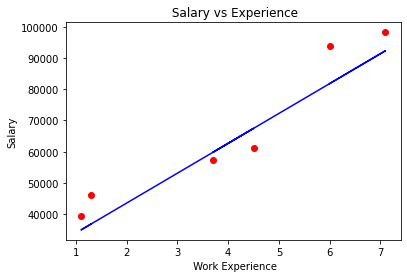

In [100]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()

**Accuracy**

In [101]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8886956540959012
Mean Absolute Error :  6802.78006105838


### Using Sklearn Model

In [102]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
sklearn_prediction = regr.predict(X_test)

In [103]:
# R squared error
score_1 = metrics.r2_score(Y_test, sklearn_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, sklearn_prediction)

print("R squared error (sklearn) : ", score_1)
print('Mean Absolute Error (sklearn) : ', score_2)

R squared error (sklearn) :  0.8886956733784565
Mean Absolute Error (sklearn) :  6802.779572073898


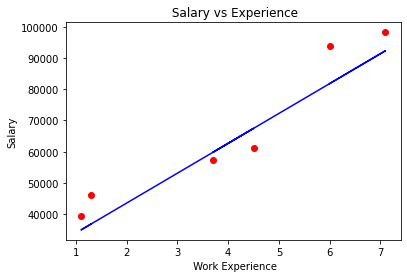

In [24]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, sklearn_prediction, color='blue')
#plt.plot(X_test, test_data_prediction, color='green')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()